# 10. Datos para entrenar redes neuronales
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)

In [34]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0-rc1


### Datos

In [0]:
from google.colab import files
# se debe cargar el fichero “cats_and_dogs_small.zip”
files.upload()

Saving cats_and_dogs_small.zip to cats_and_dogs_small (1).zip


In [0]:
# ULL que aquest es el meu fitxer
#!wget --no-check-certificate \
#  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0 \
#  -O /content/cats_and_dogs_small.zip

--2019-12-25 17:57:14--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.1, 2620:100:6019:1::a27d:401
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip [following]
--2019-12-25 17:57:14--  https://www.dropbox.com/s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4ba99f4816f0a56a8ce61c79d9.dl.dropboxusercontent.com/cd/0/inline/Au4-e_TgnkHpe2TrGGaan5xKZwWfP-CcJXr2ToSg0OoXqye86klvf7cp1Vab9fkOBH3nhQTZ4gYzbvByySI030Jb3ioBjCEMjcGuZADw93mDgSpISpaqD-6VlEzeVWeWw4U/file# [following]
--2019-12-25 17:57:14--  https://uc4ba99f4816f0a56a8ce61c79d9.dl.dropboxusercontent.com/cd/0/inline/Au4-e_TgnkHpe2TrGGaan5xKZwWfP-CcJXr2ToSg0OoXqye86klvf7cp1Vab9fkOBH3nhQTZ4gYz

In [4]:
!ls

cats_and_dogs_small.zip  sample_data


In [0]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_small.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()


In [0]:

base_dir = '/content/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')



In [7]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])


['cat.449.jpg', 'cat.299.jpg', 'cat.17.jpg', 'cat.370.jpg', 'cat.835.jpg']
['dog.240.jpg', 'dog.568.jpg', 'dog.874.jpg', 'dog.244.jpg', 'dog.184.jpg']
['cat.1136.jpg', 'cat.1124.jpg', 'cat.1133.jpg', 'cat.1034.jpg', 'cat.1081.jpg']
['dog.1374.jpg', 'dog.1006.jpg', 'dog.1362.jpg', 'dog.1363.jpg', 'dog.1369.jpg']
['cat.1983.jpg', 'cat.1861.jpg', 'cat.1926.jpg', 'cat.1851.jpg', 'cat.1830.jpg']
['dog.1955.jpg', 'dog.1667.jpg', 'dog.1679.jpg', 'dog.1565.jpg', 'dog.1822.jpg']


In [8]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


Figura 10.3


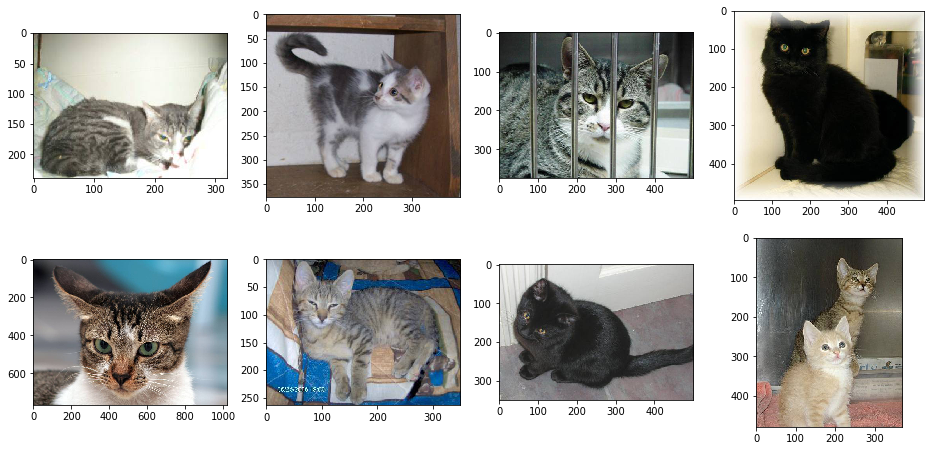

Figura 10.4


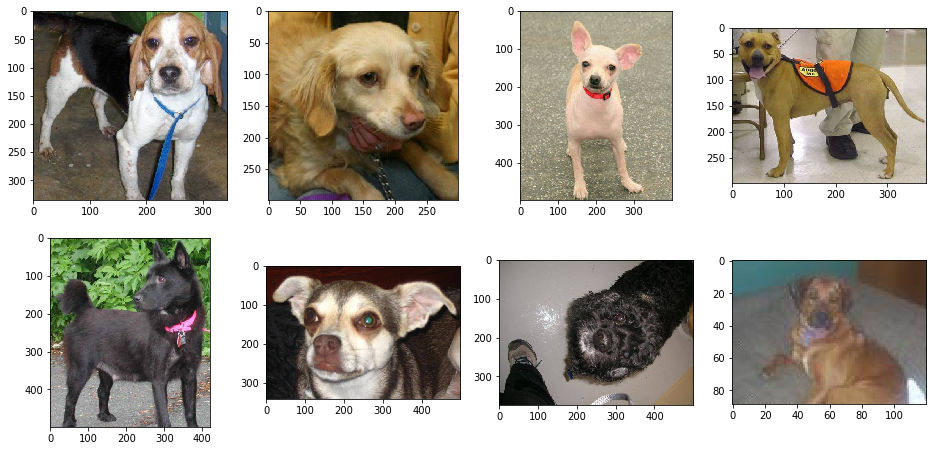

Figura 10.5


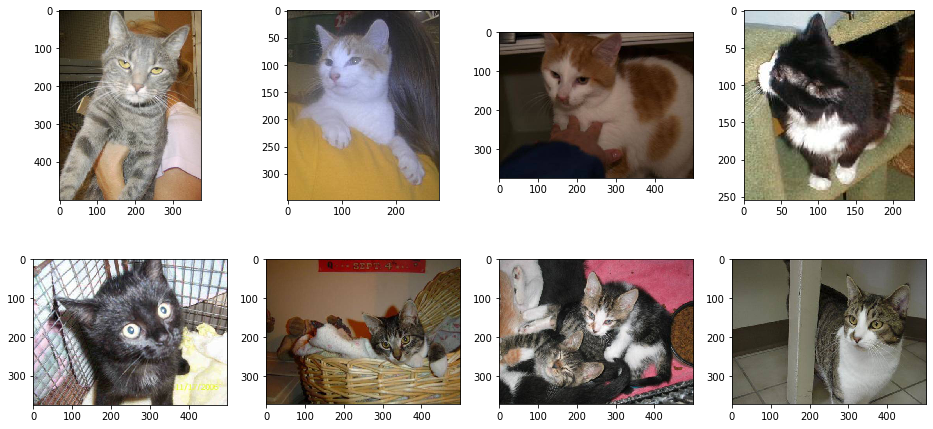

Figura 10.6


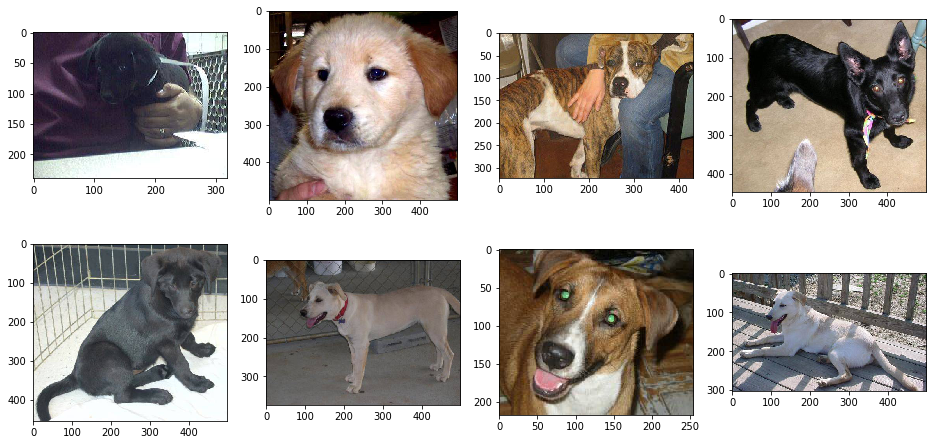

Figura 10.7


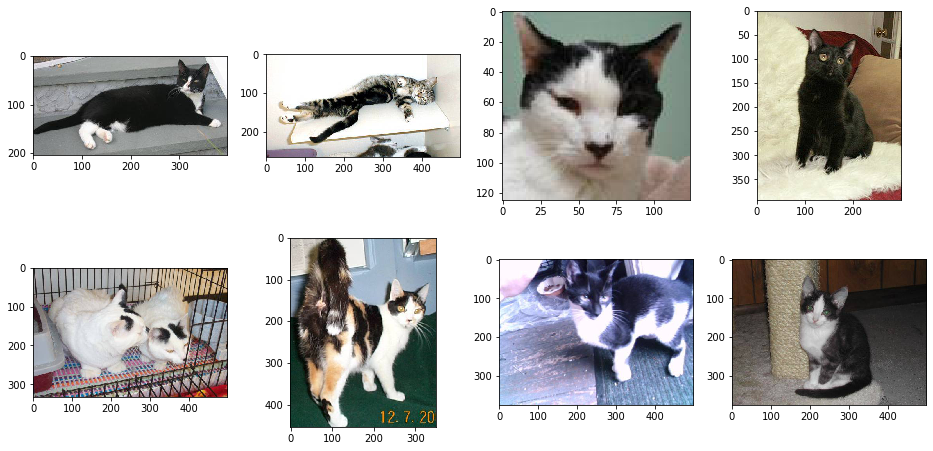

Figura 10.8


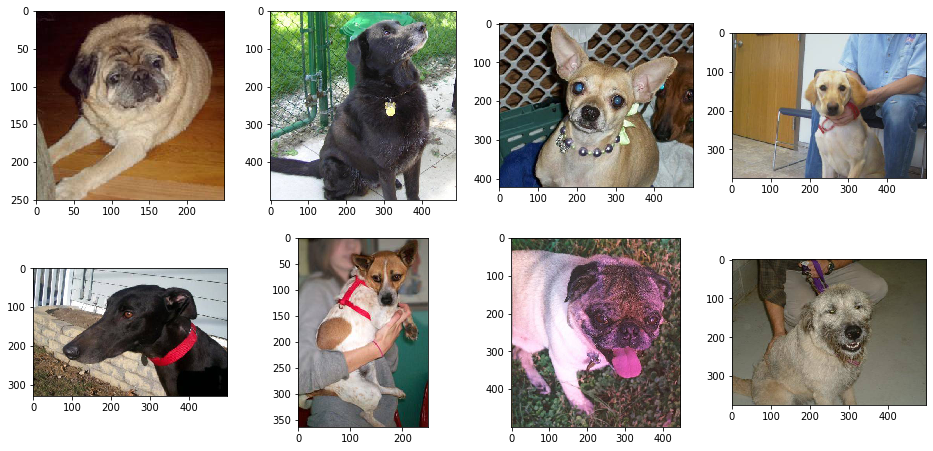

In [12]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir, fnames):
  # presentaremos images en una configuración de 4x4
  nrows = 4
  ncols = 4

  pic_index = 0 # Índice para iterar sobre las imagenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8

  next_pix = [os.path.join(dir, fname) 
                for fname in fnames[ pic_index-8:pic_index] 
               ]

  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

  
print("Figura 10.3")
print_pictures(train_cats_dir, train_cat_fnames)
print("Figura 10.4")
print_pictures(train_dogs_dir, train_dog_fnames)
print("Figura 10.5")
print_pictures(validation_cats_dir, validation_cat_fnames)
print("Figura 10.6")
print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Figura 10.7")
print_pictures(test_cats_dir, test_cat_fnames)
print("Figura 10.8")
print_pictures(test_dogs_dir, test_dog_fnames)

## Modelo básico

In [0]:
import tensorflow as tf
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics = ['acc'])


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)


100
50


In [26]:
history = model.fit(
      train_generator,
      steps_per_epoch= steps_per_epoch,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps= validation_steps,  
      verbose=2)



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 8s - loss: 0.6884 - acc: 0.5415 - val_loss: 0.6690 - val_acc: 0.6000
Epoch 2/100
100/100 - 7s - loss: 0.6600 - acc: 0.6165 - val_loss: 0.6441 - val_acc: 0.6250
Epoch 3/100
100/100 - 7s - loss: 0.6167 - acc: 0.6690 - val_loss: 0.6236 - val_acc: 0.6290
Epoch 4/100
100/100 - 7s - loss: 0.5686 - acc: 0.7025 - val_loss: 0.6196 - val_acc: 0.6470
Epoch 5/100
100/100 - 7s - loss: 0.5245 - acc: 0.7370 - val_loss: 0.6526 - val_acc: 0.6240
Epoch 6/100
100/100 - 7s - loss: 0.4919 - acc: 0.7590 - val_loss: 0.5623 - val_acc: 0.7040
Epoch 7/100
100/100 - 7s - loss: 0.4626 - acc: 0.7840 - val_loss: 0.5620 - val_acc: 0.7130
Epoch 8/100
100/100 - 7s - loss: 0.4375 - acc: 0.7940 - val_loss: 0.5347 - val_acc: 0.7340
Epoch 9/100
100/100 - 7s - loss: 0.4107 - acc: 0.8090 - val_loss: 0.5530 - val_acc: 0.7220
Epoch 10/100
100/100 - 7s - loss: 0.3854 - acc: 0.8280 - val_loss: 0.5391 - val_acc: 0.7

In [0]:
history_dict = history.history
print(history_dict.keys())

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

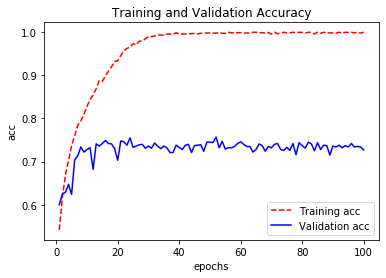

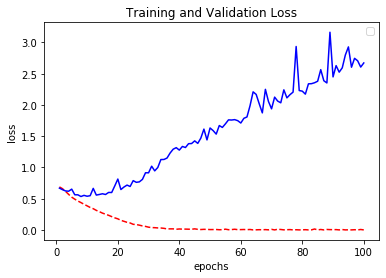

<Figure size 432x288 with 0 Axes>

In [27]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()




In [32]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

  ...
    to  
  ['...']
50/50 [==============================] - 3s 51ms/step - loss: 2.6724 - acc: 0.7270
Test Accuracy: 0.727


In [29]:
history_dict = history.history
print(history_dict.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Saving Wiliams-foto1.jpg to Wiliams-foto1.jpg
[4.784403e-37]


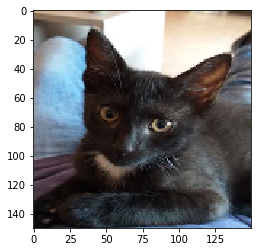

Wiliams-foto1.jpg IS A DOG


In [31]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  plt.imshow(img)  
  plt.show()
  
  if classes[0]>0:
    print( fn + " IS A DOG")
    
  else:
    print( fn + " IS A CAT")


In [0]:
import os, signal

os.kill( os.getpid() , 
         signal.SIGKILL
       )
